# Setup, globals

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
PATH = 'C:/Users/Daniel/Github/Wine quality analysis/'
DATA_PATH = PATH + 'data/'
pd.options.display.float_format = '{:.3f}'.format

# Data

In [68]:
red = pd.read_csv(DATA_PATH + 'winequality-red.csv', sep=';')
white = pd.read_csv(DATA_PATH + 'winequality-white.csv', sep=';')

red['red'] = 1
white['red'] = 0

print(red.shape, white.shape)
print('Share red: {:.2f}'.format(red.shape[0]/white.shape[0]))

(1599, 13) (4898, 13)
Share red: 0.33


Note the imbalance: only 33% are red wines

In [69]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,1
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,1
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6,1
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1


In [70]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
1,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
2,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
3,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
4,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0


In [71]:
wine = pd.concat([red, white])
n_obs, n_vars = wine.shape
print(wine.shape)
wine.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,1
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,1
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6,1
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1


In [72]:
wine.to_csv(DATA_PATH + 'wines_combined.csv', index=False)

# Exploratory Analysis 

### Summary Statistics

In [73]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818,0.246
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873,0.431
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000,0.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000,0.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000,0.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000,0.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000,1.000


- The majority of the wines are white: 24.6% are red
- No missings
- large range of values -> might need scaling for some estimators
- Including quality and the new create 'red' variable we have 13 variables

In [74]:
# quality per wine
table = pd.crosstab(index = wine['quality'], columns=wine["red"])
table = table / [n_obs - wine['red'].sum(), wine['red'].sum()]
table['diff'] = table[0] - table[1]
table

red,0,1,diff
quality,,,
3,0.004,0.006,-0.002
4,0.033,0.033,0.000
5,0.297,0.426,-0.128
6,0.449,0.399,0.050
7,0.180,0.124,0.055
8,0.036,0.011,0.024
9,0.001,0.000,0.001


- No wines ranked 1 or 2
- barely any wine ranked 9 or 3, most between 5 and 7
    -> hard to predict great wines
- generally class imbalance
- white wines overall ranked higher
    - we can check if this difference is significant with a ttest. A qq-plot shows that the quality is more or less normally distributed and the test thereby valid.

In [75]:
print(wine.groupby('red')['quality'].mean())
from scipy import stats
stats.ttest_ind(wine[wine['red']==0]['quality'], wine[wine['red']==1]['quality'])

red
0   5.878
1   5.636
Name: quality, dtype: float64


Ttest_indResult(statistic=9.6856495541876964, pvalue=4.8880690442015081e-22)

Text(0.5,1,'red')

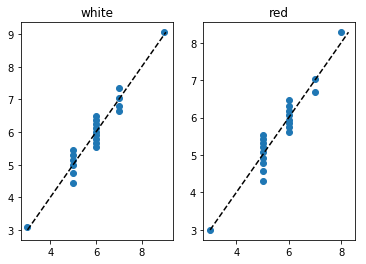

In [76]:
def qq_plot(a):
    b = np.random.normal(a.mean(),a.std(),a.shape[0])
    
    percs = np.linspace(0,100,21)
    qn_a = np.percentile(a, percs)
    qn_b = np.percentile(b, percs)

    plt.plot(qn_a,qn_b, ls="", marker="o")

    x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
    plt.plot(x,x, color="k", ls="--")

    
plt.subplot(121)    
qq_plot(np.sort(wine['quality'][wine['red']==0]))
plt.title('white')
plt.subplot(122)    
qq_plot(np.sort(wine['quality'][wine['red']==1]))
plt.title('red')

### Distributions

We start off by looking at the distributions of the different variables, both by wine type and by quality. Note that the kernel density estimates (kde) can be misleading for the categories with only few observations (i.e. quality 3,4,8,9)

Findings:
- The distributions generally differ quite a lot across wine colors. This ist most pronounced (but not limited to) for:
    - volatile acidity, residual sugar, chlorides, total sulfur dioxide, pH, sulphates.
    - Only alcohol seems fairly similar
- alcohol appears to be truncated on the left, which makes sense considering the nature of wines.
- a number of variables seem to be quite skewed (at least when considered by color):
    - fixed acidity
    - volatile acidity
    - residual sugar
    - chlorides
    - free & total sulfur dioxide
    - sulphates
    - quantification: include skeweness stats?
- Per quality it is harder to get a clear picture. We find most differences for:
    - volatile acidity (red)
    - citric acid (red)
    - sulphates (red)
    - alcohol
    - white wines ranked 9 are quite conspicuous, but as these are so few examples let's not draw conclusions

In [77]:
skew_all = np.expand_dims(stats.skew(wine), axis=0)
skew_white = np.expand_dims(stats.skew(wine[wine['red'] == 0]), axis=0)
skew_red = np.expand_dims(stats.skew(wine[wine['red'] == 1]), axis=0)
table_skewed = pd.DataFrame(np.concatenate([skew_all, skew_white, skew_red], axis=0), 
                     columns = wine.columns, 
                     index = ['all', 'white', 'red'])
display(table_skewed)

vars_skewed = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
all,1.723,1.495,0.472,1.435,5.399,1.220,-0.001,0.503,0.387,1.797,0.566,0.190,1.179
white,0.648,1.576,1.282,1.077,5.022,1.406,0.391,0.977,0.458,0.977,0.487,0.156,0.000
red,0.982,0.671,0.318,4.536,5.675,1.249,1.514,0.071,0.194,2.426,0.860,0.218,0.000


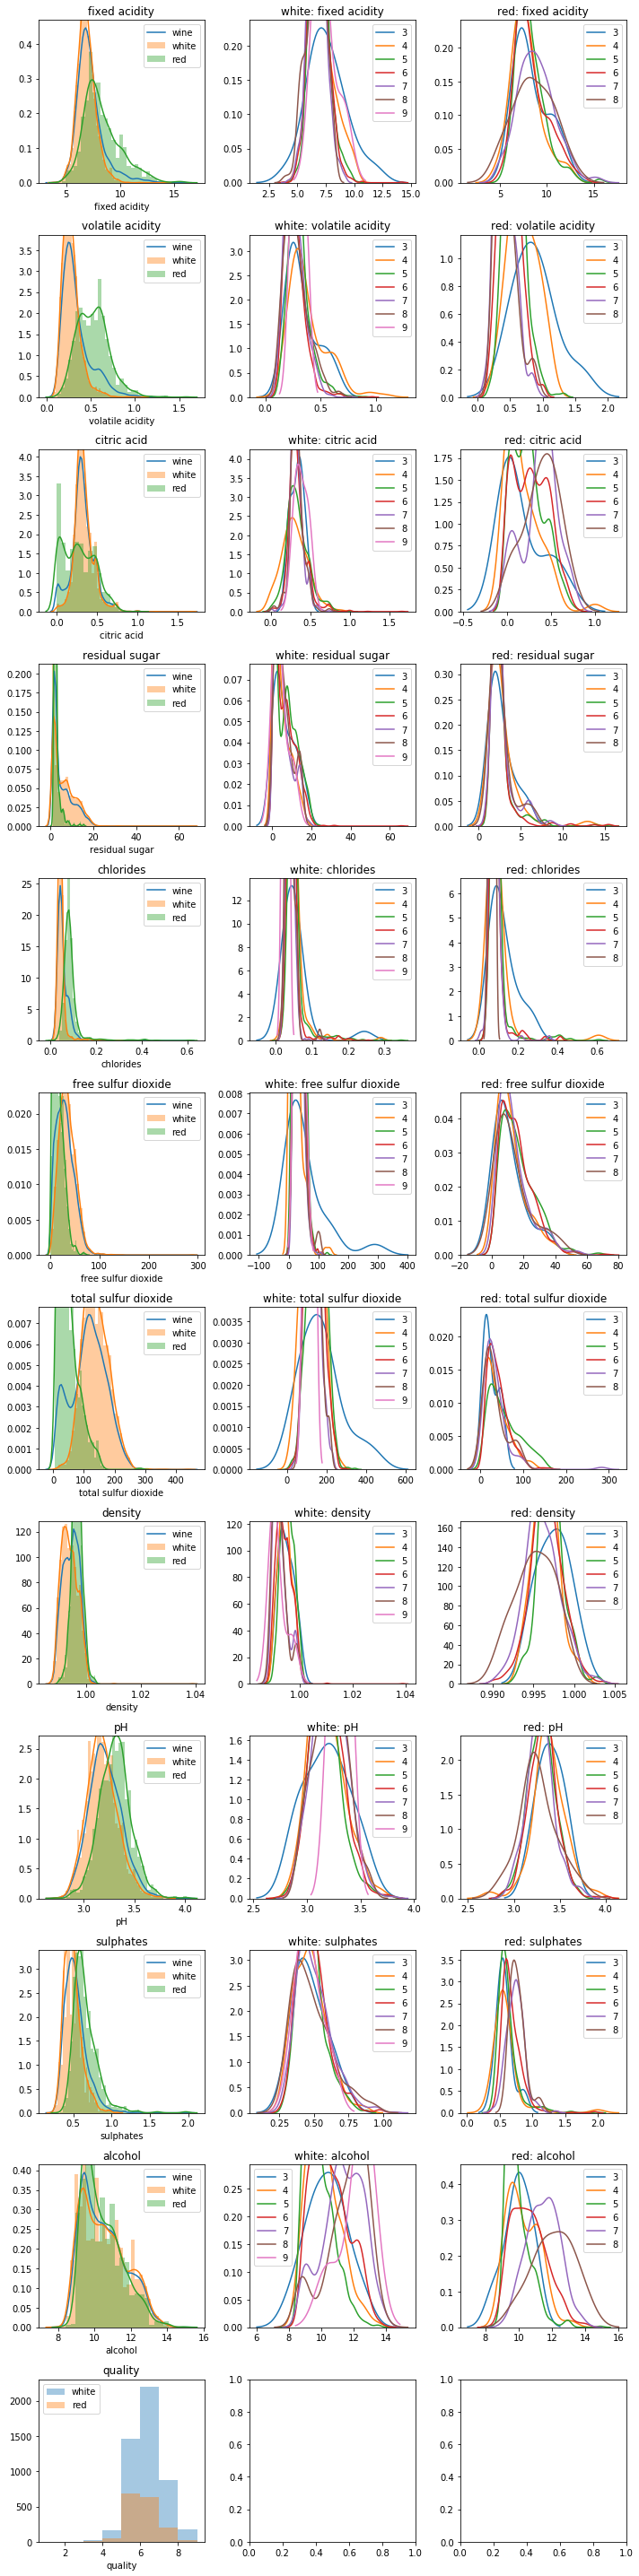

In [78]:
# kde MISSLEADING FOR CLASSES WITH FEW OBSERVATIONS!
f, ax = plt.subplots(12,3, figsize=(10,40))
for i, var in enumerate(wine.columns):
    if var not in  ['red', 'quality']:
        w = wine[wine['red'] == 0]
        r = wine[wine['red'] == 1]
        
        sns.kdeplot(wine[var], ax=ax[i,0], label='wine')
        sns.distplot(w[var], ax=ax[i,0], label='white').set_title(var)
        sns.distplot(r[var], ax=ax[i,0], label='red')
        ax[i,0].legend()
        
        for q in range(1,10):
            if w[w['quality']==q].any().any():
                sns.kdeplot(w[w['quality']==q][var], 
                             ax=ax[i,1], 
                             label=str(q)).set_title('white: ' + var)
            if r[r['quality']==q].any().any():
                sns.kdeplot(r[r['quality']==q][var], 
                             ax=ax[i,2], 
                             label=str(q)).set_title('red: ' + var)
                
        ax[i,1].legend()
        ax[i,2].legend()
            
    if var == 'quality':
        #sns.kdeplot(wine[var], ax=ax[i,0], label='wine')
        sns.distplot(w[var], ax=ax[i,0], label='white', kde=False, bins=[1,2,3,4,5,6,7,8,9]).set_title(var)
        sns.distplot(r[var], ax=ax[i,0], label='red', kde=False, bins=[1,2,3,4,5,6,7,8,9])
    
        ax[i,0].legend()
        
f.tight_layout()

Let's compare the log distributions for the skewed ones

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


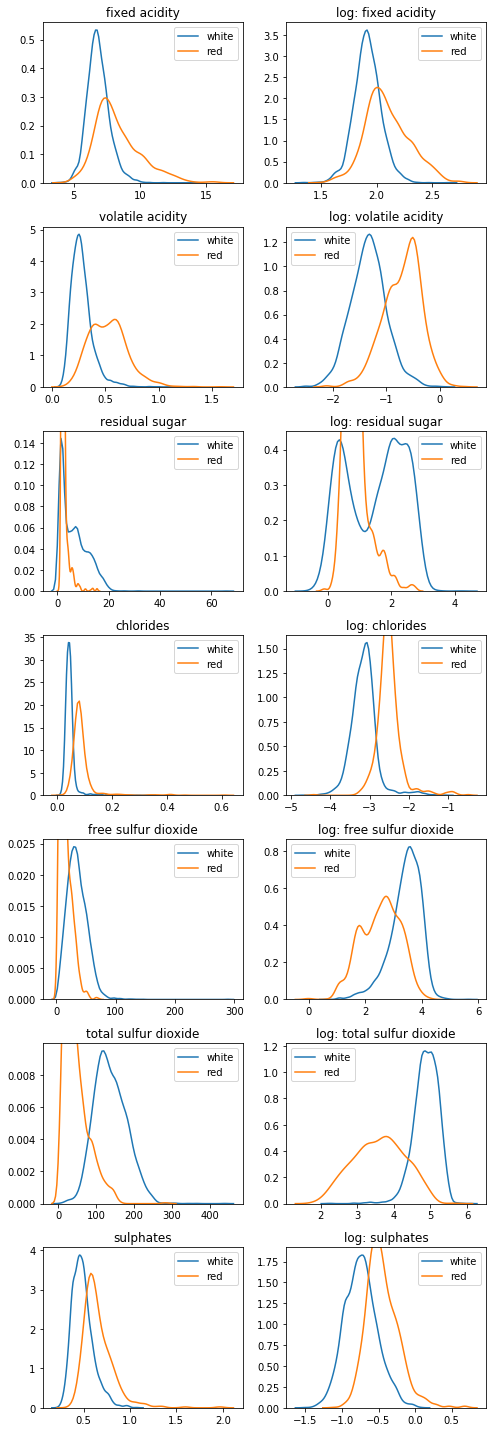

In [79]:
# compare with log
wine_log = np.log(wine)
wine_log[['red', 'quality']] = wine[['red', 'quality']]
# fix divide by zero
wine_log['citric acid'] = np.log1p(wine['citric acid'])


f, ax = plt.subplots(len(vars_skewed),2, figsize=(7,20))
for i, var in enumerate(vars_skewed):
    if var not in  ['red', 'quality']:
        sns.kdeplot(wine[wine['red']==0][var], ax=ax[i,0], label='white').set_title(var)
        sns.kdeplot(wine[wine['red']==1][var], ax=ax[i,0], label='red')
    
        sns.kdeplot(wine_log[wine['red']==0][var], ax=ax[i,1], label='white').set_title('log: ' + var)
        sns.kdeplot(wine_log[wine['red']==1][var], ax=ax[i,1], label='red')
f.tight_layout()

By eye log helps for skewness in:
    - volatile acidity
    - chlorides
    - maybe free & total sulfur dioxide
    - maybe sulphates
    - not sure for residual sugar
    
By table log helps for skewness in:  
    - fixed acidity
    - volatile acidity
    - residual sugar
    - chlorides
    - sulpahtes
    
Let's quantify:

In [80]:
skew_all   = np.expand_dims(stats.skew(wine_log), axis=0)
skew_white = np.expand_dims(stats.skew(wine_log[wine['red'] == 0]), axis=0)
skew_red   = np.expand_dims(stats.skew(wine_log[wine['red'] == 1]), axis=0)
table_skewed_log = pd.DataFrame(np.concatenate([skew_all, skew_white, skew_red], axis=0), 
                     columns = wine.columns, 
                     index = ['all - log', 'white - log', 'red - log'])
display(table_skewed.append(table_skewed_log))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
all,1.723,1.495,0.472,1.435,5.399,1.220,-0.001,0.503,0.387,1.797,0.566,0.190,1.179
white,0.648,1.576,1.282,1.077,5.022,1.406,0.391,0.977,0.458,0.977,0.487,0.156,0.000
red,0.982,0.671,0.318,4.536,5.675,1.249,1.514,0.071,0.194,2.426,0.860,0.218,0.000
all - log,0.889,0.328,-0.089,0.241,0.876,-0.834,-1.384,0.467,0.227,0.405,0.382,0.190,1.179
white - log,0.077,0.139,0.612,-0.161,1.134,-0.936,-0.984,0.931,0.299,0.234,0.310,0.156,0.000
red - log,0.394,-0.434,0.087,1.805,1.744,-0.234,-0.079,0.063,0.005,0.921,0.661,0.218,0.000


In [81]:
# add the selected log vars to the df, to include in further exploration
to_transform = ['fixed acidity','volatile acidity','residual sugar','chlorides','sulphates']
wine = wine.join(wine_log[to_transform], rsuffix='_log')
wine = wine.sort_index(axis=1)

# drop untransformed ones
wine = wine.drop(to_transform, axis=1)

### Correlations 

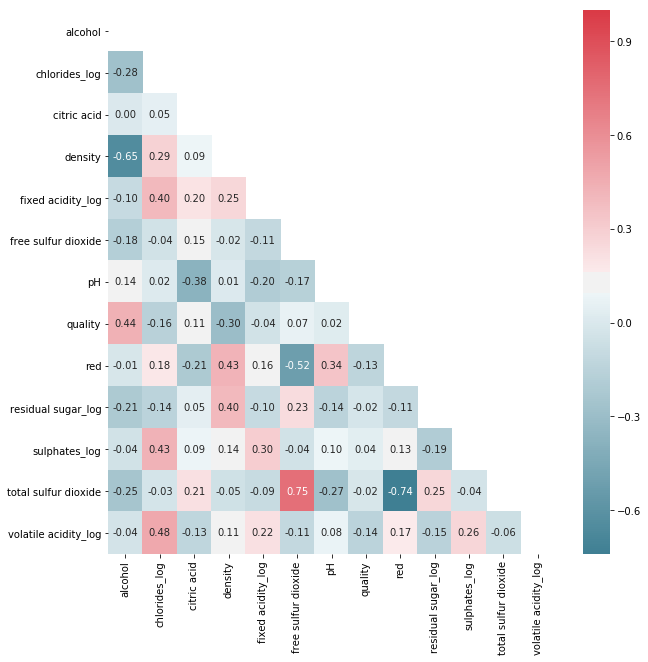

In [82]:
corrs = wine.corr()
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10,10))
sns.heatmap(corrs, mask = mask, cmap = cmap, annot=True, fmt=".2f");

- no collinearity high enough to lead to serious trouble. But:
- strong negative correlations between:
    - red & total sulfur dioxide (-0.74)
    - density & alcohol (-0.65)
- high positive between:
    - volatile acidity & red 
    - total & free sulfur dioxide (0.75)

### Pairsplot 

Let's look closer at the relationships between certain variables. As the dimensionality is already on the higher side, we focus on the correlated pairs.  

In [83]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    
    return df.sort_values(by='corr',ascending=False)

corranks = corrank(wine)
selected = corranks[np.abs(corranks['corr']) > 0.4]
display(selected)
vars_corr = selected['pairs']

vars_corr

,pairs,corr
55,"(free sulfur dioxide, total sulfur dioxide)",0.745
22,"(chlorides_log, volatile acidity_log)",0.480
6,"(alcohol, quality)",0.442
20,"(chlorides_log, sulphates_log)",0.434
37,"(density, red)",0.426
52,"(free sulfur dioxide, red)",-0.517
2,"(alcohol, density)",-0.648
70,"(red, total sulfur dioxide)",-0.739


55    (free sulfur dioxide, total sulfur dioxide)
22          (chlorides_log, volatile acidity_log)
6                              (alcohol, quality)
20                 (chlorides_log, sulphates_log)
37                                 (density, red)
52                     (free sulfur dioxide, red)
2                              (alcohol, density)
70                    (red, total sulfur dioxide)
Name: pairs, dtype: object

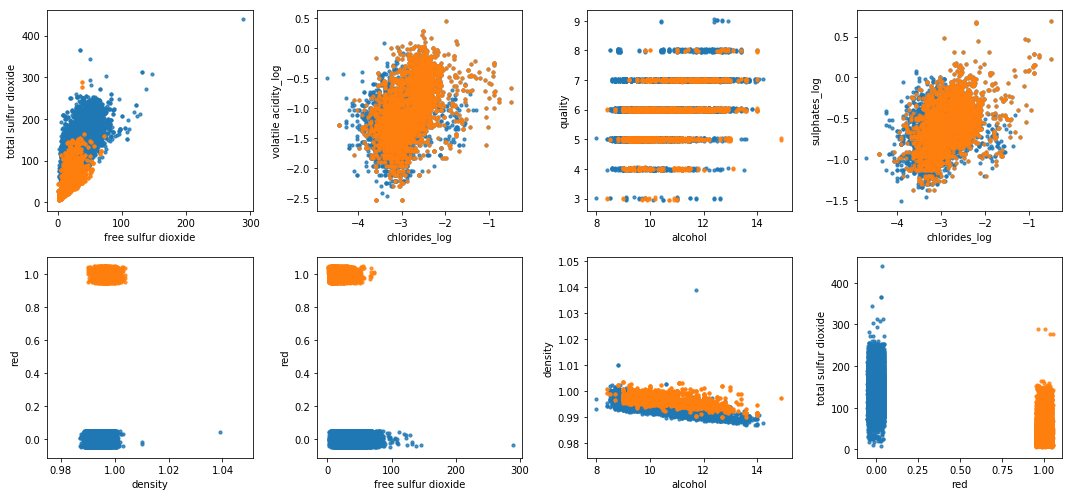

In [84]:
f, ax = plt.subplots(2, 4, figsize=(15,7))
for i, (x,y) in enumerate(vars_corr):
    # add jitter for categorical variable
    if 'red' in [x] or  'quality' in [x]: xjit=0.05
    elif 'red' in [y] or 'quality' in [y]: yjit = 0.05
    else: yjit, xjit = 0., 0.
    sns.regplot(x, y, wine[wine['red']==0], color = 'tab:blue', ax=ax.flatten()[i], fit_reg=False, y_jitter=yjit, x_jitter=xjit, scatter_kws={"s": 10})
    sns.regplot(x, y, wine[wine['red']==1], color = 'tab:orange', ax=ax.flatten()[i], fit_reg=False, y_jitter=yjit, x_jitter=xjit, scatter_kws={"s": 10})
f.tight_layout()

Let's check each variables relationship with our target, quality

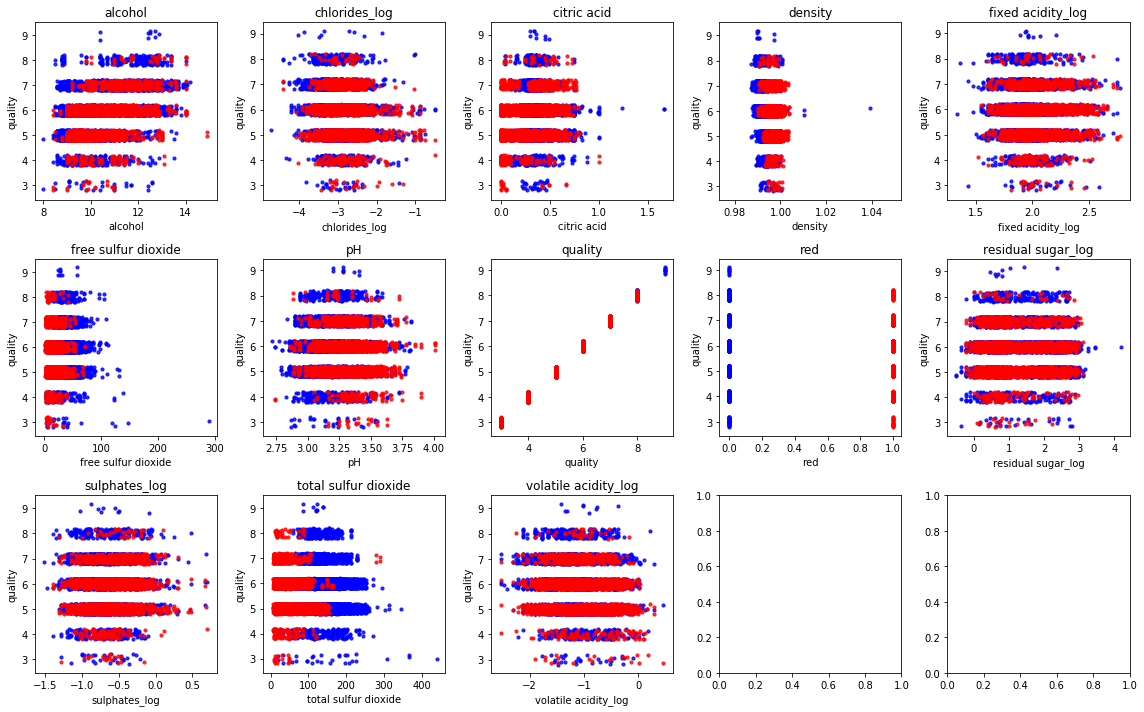

In [85]:
# ALSO NOTE THE OUTLIERS HERE
f, ax = plt.subplots(3,5, figsize=(16,10))
for i, var in enumerate(wine.columns):
    #sns.regplot(wine[var], wine['quality'], ax=ax.flatten()[i], y_jitter=0.1, fit_reg=False, scatter_kws={"s": 10}).set_title(var)
    sns.regplot(wine.where(wine['red']==0)[var], wine.where(wine['red']==0)['quality'], color='b', ax=ax.flatten()[i], y_jitter=0.2, fit_reg=False, scatter_kws={"s": 10}).set_title(var)
    sns.regplot(wine.where(wine['red']==1)[var], wine.where(wine['red']==1)['quality'], color='r', ax=ax.flatten()[i], y_jitter=0.2, fit_reg=False, scatter_kws={"s": 10}).set_title(var)
f.tight_layout()

Boxplots by category are great to identify whether we have non-linear relationships

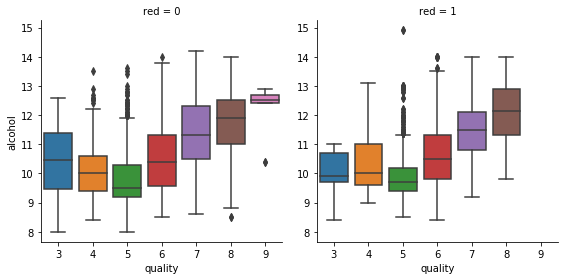

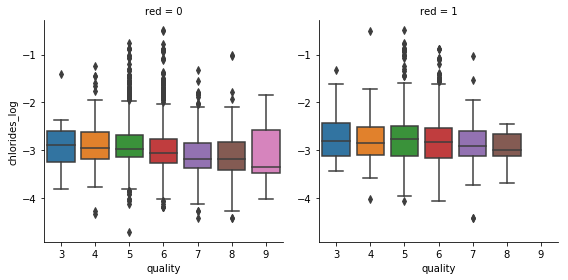

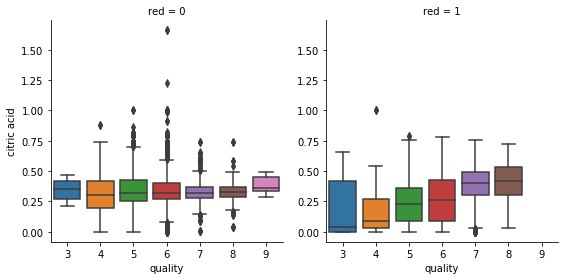

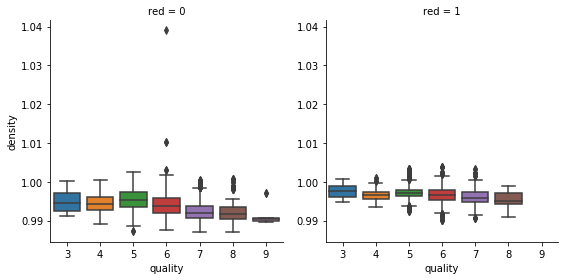

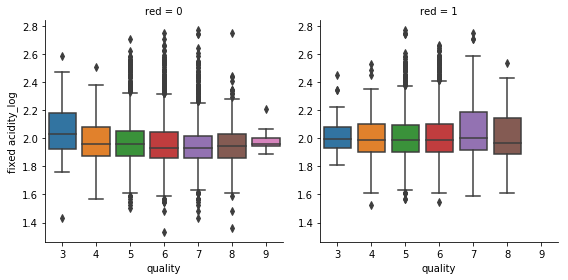

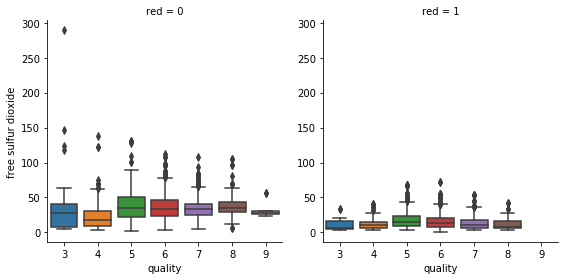

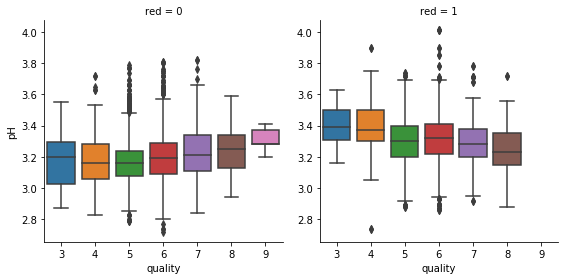

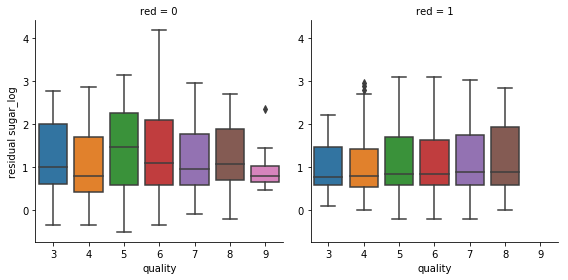

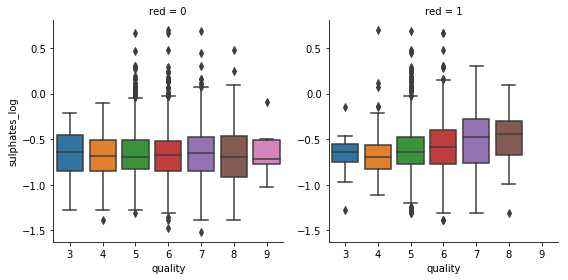

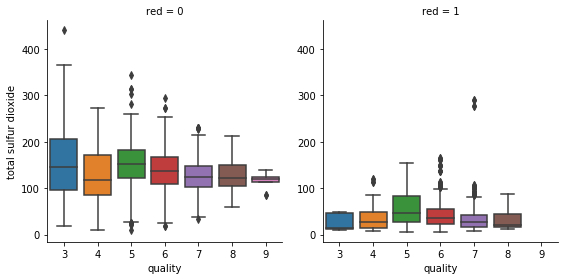

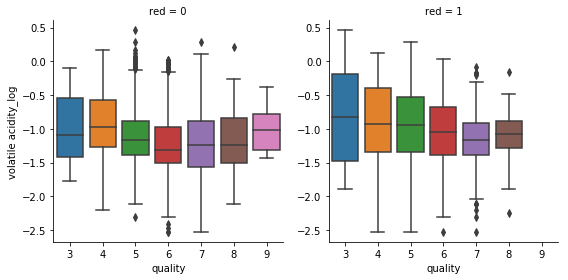

In [86]:
for i, var in enumerate(wine.columns):
    if var not in ['quality', 'red']:
        g = sns.factorplot(x='quality', y=var, data=wine, kind='box', col='red');

- relationship differs strongly for white and red wines
- many out of range values
- a number of non-linear relationships:
    - both: alcohol
    - white:
        - pH
        - volatile acidity
    - red:
        - total sulfur dioxide
        - fixed acidity
    
- 2 potential outliers: in residual sugar / density and in free sulfur dioxide  
    They exceed the rule of thumb of more than Q3 + 3*IQ.  
    But the data seems to be preprocessed and there might be good reason to keep them. But let's use robust scaling  to ensure this does not impact the scaling.

In [87]:
# which are the outliers?
wine[['free sulfur dioxide', 'residual sugar_log', 'density']].idxmax()

free sulfur dioxide    4745
residual sugar_log     2781
density                2781
dtype: int64

In [88]:
wine.to_csv(DATA_PATH + 'wines_transformed.csv', index=False)